In [178]:
import pandas as pd
import numpy as np
import sqlite3

In [179]:
path = '/Users/nozomi0407/DSP2_Last/'
db_name = 'arima.sqlite'
 #DB内のデータ参照
# 1．DBに接続する
con = sqlite3.connect(path + '/' + db_name)
# print(type(con))
# 2．SQLを実行するためのオブジェクトを取得
cur = con.cursor()
# 3．SQLを用意
# SELECT * FROM テーブル名;
# *の部分は取得したい列の名前をカンマ区切りで指定することもできる
sql_select = 'SELECT * FROM arima;'
# 4．SQLを実行
cur.execute(sql_select)
for r in cur:
  print(r)
# 6．DBへの接続を閉じる
con.close()

('有馬記念(G1)', '晴', 2, 1, '武豊', '芝2500', '良', '506(+2)')
('ジャパンC(G1)', '曇', 3, 4, '戸崎圭太', '芝2400', '良', '504(-8)')
('天皇賞(秋)(G1)', '晴', 2, 7, '戸崎圭太', '芝2000', '良', '512(+4)')
('京都記念(G2)', '晴', 1, 1, '武豊', '芝2200', '良', '508(0)')
('東京優駿(G1)', '晴', 3, 1, '武豊', '芝2400', '良', '490(-6)')
('皐月賞(G1)', '曇', 1, 3, '武豊', '芝2000', '良', '496(-8)')
('報知弥生ディープ記念(G2)', '曇', 1, 2, '武豊', '芝2000', '良', '504(+8)')
('朝日フューチュリティ(G1)', '晴', 3, 1, '武豊', '芝1600', '良', '496(-10)')
('アイビーS(L)', '晴', 2, 1, '武豊', '芝1800', '良', '506(+12)')
('2歳新馬', '曇', 1, 1, '武豊', '芝1800', '良', '494(0)')
('有馬記念(G1)', '晴', 7, 2, 'ルメール', '芝2500', '良', '494(-2)')
('ジャパンC(G1)', '曇', 5, 3, 'ビュイッ', '芝2400', '良', '496(+12)')
('ヴィクトリアマイル(G1)', '小雨', 1, 3, 'ルメール', '芝1600', '良', '484(0)')
('大阪杯(G1)', '晴', 1, 2, 'ルメール', '芝2000', '良', '484(+12)')
('秋華賞(G1)', '晴', 1, 3, 'ルメール', '芝2000', '良', '472(+8)')
('優駿牝馬(G1)', '晴', 3, 1, 'ルメール', '芝2400', '良', '464(-6)')
('桜花賞(G1)', '晴', 7, 1, '川田将雅', '芝1600', '良', '470(-4)')
('デイリー杯クイーンC(G3)', '晴', 1, 2, '横

In [180]:
frame1 = sqlite3.connect('arima.sqlite')
cursor1 = frame1.cursor()
frame2 = sqlite3.connect('arima_local.sqlite')
cursor2 = frame2.cursor()

In [181]:
cursor1.execute('SELECT * FROM arima')
data1 = cursor1.fetchall()
cursor2.execute('SELECT * FROM arima_local')
data2 = cursor2.fetchall()

In [182]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [183]:
df1.columns = ["レース名","天気","人気","label_rank","騎手","距離","馬場","馬体重"]
df1

,レース名,天気,人気,label_rank,騎手,距離,馬場,馬体重
0,有馬記念(G1),晴,2,1,武豊,芝2500,良,506(+2)
1,ジャパンC(G1),曇,3,4,戸崎圭太,芝2400,良,504(-8)
2,天皇賞(秋)(G1),晴,2,7,戸崎圭太,芝2000,良,512(+4)
3,京都記念(G2),晴,1,1,武豊,芝2200,良,508(0)
4,東京優駿(G1),晴,3,1,武豊,芝2400,良,490(-6)
...,...,...,...,...,...,...,...,...
511,3歳未勝利,晴,1,1,川田将雅,芝2400,良,454(+2)
512,3歳未勝利,晴,5,2,福永祐一,芝2400,良,452(-14)
513,3歳未勝利,曇,2,6,シュタル,芝2200,良,466(+4)
514,3歳未勝利,晴,4,5,福永祐一,芝2200,良,462(-2)


In [184]:
df2.columns = ["一位予想","二位予想","三位予想"]
df2

,一位予想,二位予想,三位予想
0,ジャスティンパレス,ジャスティンパレス,タイトルホルダー
1,ヒートオンビート,シャフリヤール,アイアンバローズ
2,ハーパー,シャフリヤール,シャフリヤール
3,タスティエーラ,ドウデュース,スターズオンアース
4,タイトルホルダー,アイアンバローズ,ドウデュース
5,ディープボンド,ハーパー,ウインマリリン
6,タイトルホルダー,タスティエーラ,スターズオンアース
7,ディープボンド,ドウデュース,スターズオンアース
8,ディープボンド,シャフリヤール,ドウデュース
9,ジャスティンパレス,スルーセブンシーズ,スターズオンアース


In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_race = le.fit_transform(df1["レース名"].values)
label_weather = le.fit_transform(df1["天気"].values)
label_popular = le.fit_transform(df1["人気"].values)
label_distance = le.fit_transform(df1["距離"].values)
label_stage = le.fit_transform(df1["馬場"].values)
df1['label_race']=label_race
df1['label_weather']=label_weather
df1['label_popular']=label_popular
df1['label_distance']=label_distance
df1['label_stage']=label_stage
df1

,レース名,天気,人気,label_rank,騎手,距離,馬場,馬体重,label_race,label_weather,label_popular,label_distance,label_stage
0,有馬記念(G1),晴,2,1,武豊,芝2500,良,506(+2),65,1,1,8,2
1,ジャパンC(G1),曇,3,4,戸崎圭太,芝2400,良,504(-8),19,2,2,6,2
2,天皇賞(秋)(G1),晴,2,7,戸崎圭太,芝2000,良,512(+4),51,1,1,4,2
3,京都記念(G2),晴,1,1,武豊,芝2200,良,508(0),41,1,0,5,2
4,東京優駿(G1),晴,3,1,武豊,芝2400,良,490(-6),70,1,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,3歳未勝利,晴,1,1,川田将雅,芝2400,良,454(+2),5,1,0,6,2
512,3歳未勝利,晴,5,2,福永祐一,芝2400,良,452(-14),5,1,4,6,2
513,3歳未勝利,曇,2,6,シュタル,芝2200,良,466(+4),5,2,1,5,2
514,3歳未勝利,晴,4,5,福永祐一,芝2200,良,462(-2),5,1,3,5,2


In [186]:
df1 = df1.drop(columns = ["レース名","天気","人気","騎手","距離","馬場","馬体重"])
df1

,label_rank,label_race,label_weather,label_popular,label_distance,label_stage
0,1,65,1,1,8,2
1,4,19,2,2,6,2
2,7,51,1,1,4,2
3,1,41,1,0,5,2
4,1,70,1,2,6,2
...,...,...,...,...,...,...
511,1,5,1,0,6,2
512,2,5,1,4,6,2
513,6,5,2,1,5,2
514,5,5,1,3,5,2


In [187]:
label_rank1 = le.fit_transform(df2["一位予想"].values)
label_rank2 = le.fit_transform(df2["二位予想"].values)
label_rank3 = le.fit_transform(df2["三位予想"].values)
df2['label_rank1']=label_rank1
df2['label_rank2']=label_rank2
df2['label_rank3']=label_rank3
df2

,一位予想,二位予想,三位予想,label_rank1,label_rank2,label_rank3
0,ジャスティンパレス,ジャスティンパレス,タイトルホルダー,1,2,6
1,ヒートオンビート,シャフリヤール,アイアンバローズ,7,1,0
2,ハーパー,シャフリヤール,シャフリヤール,6,1,2
3,タスティエーラ,ドウデュース,スターズオンアース,4,7,4
4,タイトルホルダー,アイアンバローズ,ドウデュース,3,0,8
5,ディープボンド,ハーパー,ウインマリリン,5,8,1
6,タイトルホルダー,タスティエーラ,スターズオンアース,3,6,4
7,ディープボンド,ドウデュース,スターズオンアース,5,7,4
8,ディープボンド,シャフリヤール,ドウデュース,5,1,8
9,ジャスティンパレス,スルーセブンシーズ,スターズオンアース,1,4,4


In [188]:
df2 = df2.drop(columns = ["一位予想","二位予想","三位予想"])
df2

,label_rank1,label_rank2,label_rank3
0,1,2,6
1,7,1,0
2,6,1,2
3,4,7,4
4,3,0,8
5,5,8,1
6,3,6,4
7,5,7,4
8,5,1,8
9,1,4,4


In [189]:
df1_ex=df1.loc[:, ['label_race','label_weather','label_popular','label_distance', 'label_stage']].values
df1_ex

array([[65,  1,  1,  8,  2],
       [19,  2,  2,  6,  2],
       [51,  1,  1,  4,  2],
       ...,
       [ 5,  2,  1,  5,  2],
       [ 5,  1,  3,  5,  2],
       [ 0,  1,  2,  4,  2]])

In [190]:
df1_aim=df1.loc[:, ['label_rank']].values
df1_aim

array([[1],
       [4],
       [7],
       [1],
       [1],
       [3],
       [2],
       [1],
       [1],
       [1],
       [2],
       [3],
       [3],
       [2],
       [3],
       [1],
       [1],
       [2],
       [2],
       [3],
       [1],
       [2],
       [3],
       [5],
       [2],
       ['中'],
       [1],
       [9],
       [1],
       [1],
       [1],
       [5],
       [1],
       [13],
       [6],
       [2],
       [1],
       [4],
       [2],
       [1],
       [4],
       [2],
       [3],
       [1],
       [1],
       [7],
       [3],
       [1],
       [9],
       [9],
       [2],
       [1],
       [1],
       [5],
       [3],
       [11],
       [5],
       [2],
       [5],
       [1],
       [3],
       [4],
       [1],
       [1],
       [3],
       [1],
       [6],
       [2],
       [1],
       [2],
       [1],
       [4],
       [1],
       [7],
       [4],
       [9],
       [9],
       [6],
       [2],
       [3],
       [7],
       [16],
       [16]

In [191]:
df2=df2.loc[:, ['label_rank1','label_rank2','label_rank3']].values
df2

array([[1, 2, 6],
       [7, 1, 0],
       [6, 1, 2],
       [4, 7, 4],
       [3, 0, 8],
       [5, 8, 1],
       [3, 6, 4],
       [5, 7, 4],
       [5, 1, 8],
       [1, 4, 4],
       [5, 3, 5],
       [2, 2, 7],
       [2, 5, 3],
       [8, 9, 3],
       [0, 5, 5],
       [2, 8, 0],
       [3, 2, 8],
       [2, 2, 8]])

In [ ]:
df1.describe()

,label_race,label_weather,label_popular,label_distance,label_stage
count,516.000000,516.000000,516.000000,516.000000,516.000000
mean,47.972868,1.379845,3.635659,5.445736,1.895349
std,29.380451,0.531622,3.806868,2.416561,0.514544
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,1.000000,4.000000,2.000000
50%,50.500000,1.000000,3.000000,5.000000,2.000000
75%,70.000000,2.000000,5.000000,6.000000,2.000000
max,98.000000,3.000000,16.000000,12.000000,3.000000


<Axes: >

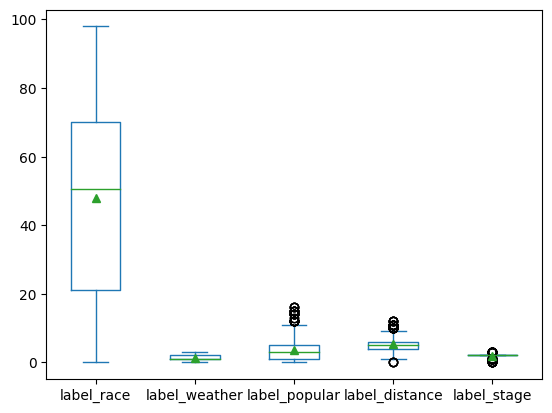

In [ ]:
df1.plot.box(showmeans=True)

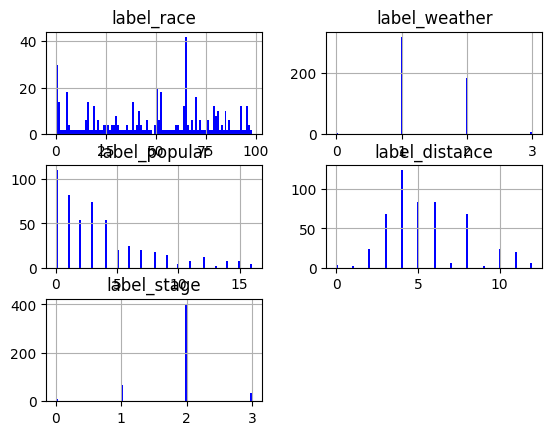

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1.hist(bins=100, color = "blue", grid =True, label = 'pandas') # ヒストグラム導出
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df1_ex, df1_aim, test_size=0.25)

In [ ]:
X_train.shape

(387, 5)

In [ ]:
y_train.shape

(387, 1)

In [ ]:
X_test.shape

(129, 5)

In [ ]:
y_test.shape

(129, 1)

In [ ]:
y_train = y_train[y_train != '中']
y_train = y_train.astype(int)
y_train.shape

(386,)

In [ ]:
y_test = y_test[y_test != '中']
y_test = y_test.astype(int)
y_test.shape

(128,)

In [ ]:
X_train = X_train[:-1, :]

In [ ]:
X_test = X_test[:-1, :]

In [ ]:
#サポートベクトルマシン
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.25

In [ ]:
#ナイーブベイズ
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model=GaussianNB()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.046875

In [ ]:
#決定木
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=DecisionTreeClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.171875

In [ ]:
#バギング
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.1953125

In [ ]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.15625

In [ ]:
#アダブースト
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=None))

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.171875

In [ ]:
#勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model=GradientBoostingClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.1484375

In [ ]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model=KNeighborsClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.1953125

In [ ]:
#ニューラルネットワーク
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier()

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

/Users/nozomi0407/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.203125

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model=MLPClassifier(max_iter=10000)

# fitで学習
model.fit(X_train, y_train)

#predictで予測
y_pred=model.predict(X_test)

# 正解率を計算
accuracy_score(y_pred, y_test)

0.203125